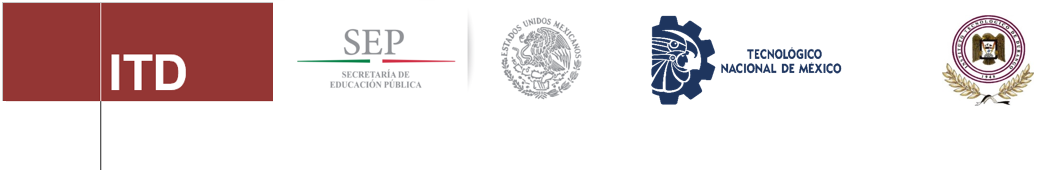

# Unidad 3

## Simulacion

## Problemas de la Unidad

### Cesar Manuel Soto

### Problema 1: Distribución Binomial

### Contexto:
Un distribuidor de artículos electrónicos recibe varios pedidos diarios. Cada día, el distribuidor tiene una probabilidad de éxito de cumplir un pedido (es decir, de tener en stock los artículos solicitados) del 70%. Desea simular la cantidad de pedidos diarios que logra satisfacer para gestionar adecuadamente sus inventarios y minimizar las faltantes de stock

### Objetivo: 

Generar una variable aleatoria que simule el número de pedidos satisfechos por día durante una semana, considerando que cada día el distribuidor recibe 20 pedidos.

Número de pedidos satisfechos en cada simulación (día):
[14, 13, 10, 18, 12, 14, 15]


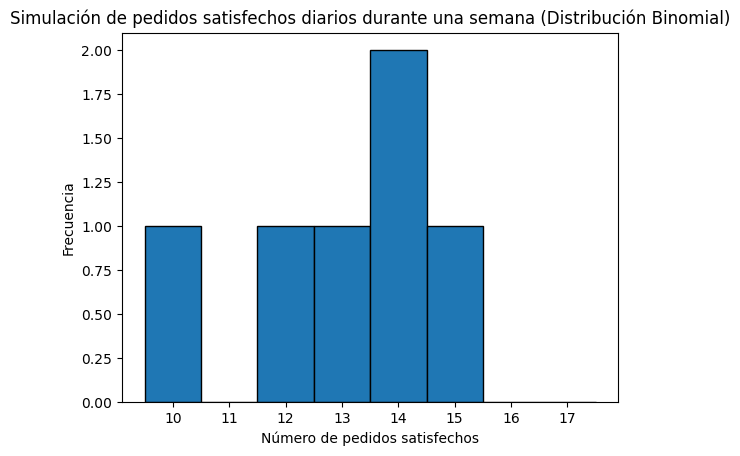

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from math import comb

# Parámetros de la distribución binomial
n = 20   # Número de pedidos diarios
p = 0.70 # Probabilidad de satisfacer un pedido

# Generar un número aleatorio uniforme U ~ Uniform(0, 1)
num_simulaciones = 7  # Número de simulaciones (días en una semana)
U = np.random.uniform(0, 1, num_simulaciones)

# Función de distribución de masa de probabilidad de la distribución binomial
def binomial_pmf(n, k, p):
    return comb(n, k) * (p**k) * ((1 - p)**(n - k))

def binomial_inverse_transform(n, p, U):
    F_k = 0  # Inicializamos la FDA
    k = 0
    while True:
        F_k += binomial_pmf(n, k, p)  # Sumamos la probabilidad hasta que F(k) >= U
        if U <= F_k:
            return k  # Este valor de k es el número de pedidos satisfechos
        k += 1

# Generar la cantidad de pedidos satisfechos en cada simulación (día)
pedidos_satisfechos_simulados = [binomial_inverse_transform(n, p, u) for u in U]

# Mostrar resultados
print("Número de pedidos satisfechos en cada simulación (día):")
print(pedidos_satisfechos_simulados)

# Graficar los resultados
plt.hist(pedidos_satisfechos_simulados, bins=np.arange(min(pedidos_satisfechos_simulados), max(pedidos_satisfechos_simulados) + 1) - 0.5, edgecolor='black')
plt.title("Simulación de pedidos satisfechos diarios durante una semana (Distribución Binomial)")
plt.xlabel("Número de pedidos satisfechos")
plt.ylabel("Frecuencia")
plt.show()


### Problema 2: Distribución Exponencial

### Contexto: 
Una estación de carga rápida para vehículos eléctricos quiere 
simular el tiempo entre la llegada de los vehículos para prever la cantidad 
de puntos de carga necesarios durante el día. La llegada de los vehículos 
sigue una distribución exponencial con una tasa de 1 llegada cada 15 
minutos, en promedio.

### Objetivo: 

Generar tiempos entre llegadas de vehículos eléctricos durante 
un día de operación (12 horas)

Tiempos de servicio generados: [6.379929851588014, 11.166035255305895, 12.438323459808936, 5.788383341766043, 3.493225282514283, 10.14261095564407, 28.148447609306135, 43.657635191885554, 1.9447151204025808, 53.930566949868435, 19.303660164577355, 44.909584478943145, 13.84333080432668, 4.362288177138537, 7.577131873411131, 46.802103845238506, 13.284224436166852, 35.64981386491509, 17.805704192824045, 4.931374255787132, 26.700912294672033, 1.5102010534520944, 9.333080056206382, 7.499103678860371, 6.621831758652048, 52.883674479339575, 5.661051026082444, 42.921343125235026, 2.8883257570637206, 1.8424496748653738, 27.60993688310725, 8.258014662270659, 12.505344112151736, 19.777099928322166, 11.692133548134876, 10.35313546390443, 83.68405044864437, 7.666347195778692, 6.109198116195961, 9.341020357504593, 38.93556315348273, 8.516866402139371, 4.251423866696592, 2.3622395096580324, 23.403347651414474, 43.6075309464457, 1.7319666930087205, 19.13008194932544, 36.461743061379714, 11.98080222631

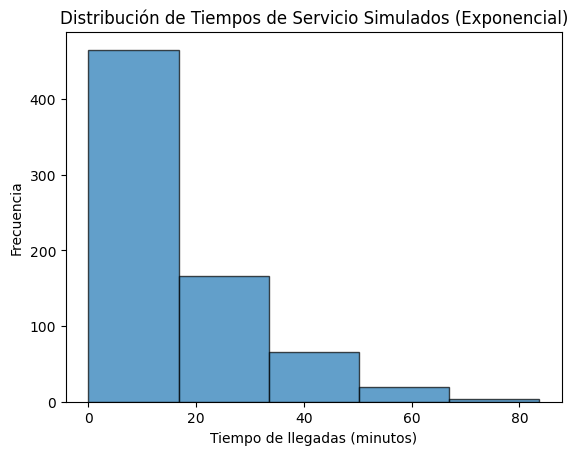

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetro de la distribución exponencial (tasa de servicio)
lambda_servicio = 1 / 15  # Tiempo promedio de servicio = 15 minutos

# Función para generar un tiempo de servicio
def generar_tiempo_servicio(lambda_servicio):
    u = np.random.uniform(0, 1)  # Generar número aleatorio uniforme
    tiempo_servicio = -1 / lambda_servicio * np.log(1 - u)  # Aplicar transformada inversa
    return tiempo_servicio

# Generar 30 tiempos de servicio
tiempos_servicio = [generar_tiempo_servicio(lambda_servicio) for _ in range(720)]

# Mostrar los tiempos de servicio
print("Tiempos de servicio generados:", tiempos_servicio)

# Graficar los tiempos de servicio simulados
plt.hist(tiempos_servicio, bins=5, edgecolor='black', alpha=0.7)
plt.title('Distribución de Tiempos de Servicio Simulados (Exponencial)')
plt.xlabel('Tiempo de llegadas (minutos)')
plt.ylabel('Frecuencia')
plt.show()



### Problema 3: Distribución LogNormal

### Contexto:
En una tienda departamental de electrónica, los tiempos de espera de los clientes para recibir atención en el mostrador de servicio técnico tienen una distribución lognormal. Se sabe que el tiempo promedio de espera es de 10 minutos y una desviación estándar de 2 minutos, lo que genera una cola considerable en ciertos momentos del día.

### Objetivo: 
Generar tiempos de espera para 50 clientes en el mostrador de servicio y analizar la duración de la fila de espera

Tiempos de inactividad generados: [2.35625110e+04 2.05819354e+04 3.57022890e+03 1.90665529e+03
 5.48107371e+02 1.66084580e+03 3.77451678e+04 1.73642314e+05
 6.31615205e+03 1.36401918e+05 3.21153123e+04 9.67306149e+03
 5.34645388e+03 2.55577819e+04 4.90227790e+04 5.25971299e+04
 1.15569893e+04 1.64867251e+04 1.91405402e+04 4.17857044e+03
 1.33650665e+04 3.76314864e+04 1.27230857e+05 7.04589576e+04
 3.47985333e+02 5.77290532e+02 4.22532387e+04 2.81334902e+04
 4.64333729e+04 1.02180434e+04 1.65253917e+04 4.04928367e+04
 1.95348688e+04 2.01559037e+04 7.42307383e+05 4.08465888e+04
 2.29895819e+05 5.20363946e+03 3.16619801e+04 4.67724937e+05
 7.14138186e+02 2.76534755e+04 2.94861420e+04 1.99106868e+04
 2.77517106e+05 6.77709627e+04 9.70547895e+03 1.13492922e+05
 6.26987294e+02 6.17358620e+04]


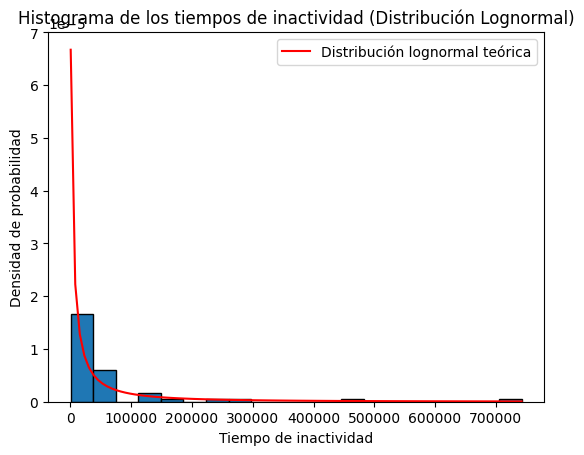

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Parámetros de la distribución lognormal
mu = 10   # Media de la variable logarítmica
sigma = 2  # Desviación estándar de la variable logarítmica
n = 50  # Número de variables aleatorias a generar

# Generar n números aleatorios U ~ Uniform(0, 1)
U = np.random.uniform(0, 1, n)

# Transformada inversa para generar tiempos de inactividad lognormales
Z = mu + sigma * stats.norm.ppf(U)
T = np.exp(Z)  # Tiempos generados

# Mostrar los resultados
print("Tiempos de inactividad generados:", T)

# Graficar histograma de los tiempos de inactividad generados
plt.hist(T, bins=20, edgecolor='black', density=True)

# Graficar la función teórica de densidad de la distribución lognormal
x = np.linspace(min(T), max(T), 100)
pdf = stats.lognorm.pdf(x, sigma, scale=np.exp(mu))
plt.plot(x, pdf, 'r', label='Distribución lognormal teórica')

plt.title("Histograma de los tiempos de inactividad (Distribución Lognormal)")
plt.xlabel("Tiempo de inactividad")
plt.ylabel("Densidad de probabilidad")
plt.legend()
plt.show()

### Conclusiones: 

Como podemos observar el uso de variables aleatorias para simular de tiempos de servicio, atención, inactividad, entre otros contextos. Sirve de mucha ayuda para poder observar de mejor manera los distintos resultados que podrian haber en casos los cuales serian demasiados largos de determinar. Las variables aleatorias nos permiten estimar distintos resultados los cuales pueden ser de mucha ayuda en la toma de decisiones estrategicas, la optimizacion de la asignación de recursos y la mejora de la eficiencia operativa de una empresa, negocio, etc. Permitiendonos observar el desempeño y rendimiento de estas, en casos similares a los vistos en los ejercicios.